In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Comparison between simulation and a real run

## Signals from real system

In [3]:
logfile = r'../logger\logs\log_230924_1910.csv'
print(logfile)
df = pd.read_csv(logfile)
df.columns

../logger\logs\log_230924_1910.csv


Index(['time_ms', 'signal_0', 'signal_1', 'signal_2', 'signal_3', 'signal_4',
       'signal_5', 'signal_6', 'signal_7', 'signal_8', 'signal_9'],
      dtype='object')

In [4]:

t = df['time_ms']*1/1000
t = np.array(t - t[0])
print("Total time")
t[-1]
log_t = t

Total time


In [5]:
# Extract signals
signals = []
for i in range(len(df.columns)-1):
    sname = f'signal_{i}'
    signals.append(df[sname].to_numpy())

# check motor.c for this
log_position = signals[0]
log_velocity = signals[1]

log_IU = signals[2]
log_IV = signals[3]
log_IW = signals[4]

log_UU = signals[5]
log_UV = signals[6]
log_UW = signals[7]


## Signals from sim

In [6]:
Y = np.load(r'..\logger\logs\sim_log_231104_1517.npy')

sim_t = Y[:,0]

sim_omega = Y[:,3]
sim_UU = Y[:,5]
sim_UV  = Y[:,6]
sim_UW  = Y[:,7]
sim_theta  = Y[:,8]
sim_IU = Y[:,9]
sim_IV = Y[:,10]
sim_IW = Y[:,11]


## Position

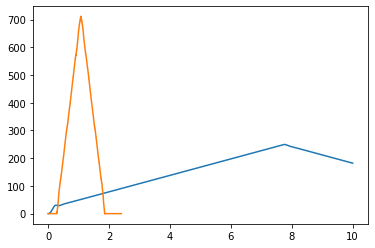

In [14]:
sim_theta -= sim_theta[0]
log_position -= log_position[0]

plt.plot(sim_t,np.rad2deg(sim_theta))
plt.plot(log_t,log_position)

## Phase voltages

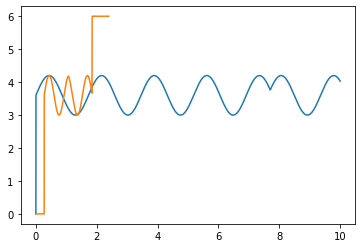

In [8]:
plt.plot(sim_t,sim_UU)
plt.plot(log_t,log_UU*12)

## Phase currents

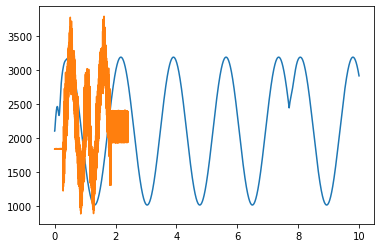

In [19]:
K = 2**12 * 0.4


plt.plot(sim_t,sim_IU*K + 2100)
plt.plot(log_t,log_IU)